# Support Vector Machines

In [26]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import svm
import os
import matplotlib.pyplot as plt

In [5]:
#insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/scripts/")

#changes current working directory to the path given 
directory = os.chdir(path)

In [6]:
#load data 
load_data = np.load('all_train_data.npy', allow_pickle=True)
df = pd.DataFrame(load_data)

# Create feature and target arrays
X = df.drop(101300, axis=1) 
y = df[101300].astype('int') #last column is the modified or not modified feature

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4 , random_state=42)

In [23]:
# Create a k-NN classifier with 7 neighbors: knn
svc = svm.SVC()

# Fit the classifier to the training data
svc.fit(X_train, y_train)

# Print the accuracy
print(svc.score(X_test, y_test))

0.9411764705882353


In [24]:
print("Test set predictions: {}".format(svc.predict(X_test)))
print("Test set accuracy: {:.2f}".format(svc.score(X_test, y_test)))

Test set predictions: [1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0]
Test set accuracy: 0.94


In [25]:
#fit classifier
svc.fit(X_train, y_train)

#predict using the X_test data
y_pred_rf = svc.predict(X_test)

#build dataframe to house the scores.
df = pd.DataFrame()

#name columns
cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy']

#name required cells 
df.loc['Machine Learning Classification Method', 
       'Details'] = 'Support Vector Machines'

#fit classifier onto both datasets to compare 
df.loc['Train Accuracy', 'Details'] = svc.score(X_train, y_train) 
df.loc['Test Accuracy', 'Details'] = svc.score(X_test, y_test)
print(df)

                                                        Details
Machine Learning Classification Method  Support Vector Machines
Train Accuracy                                            0.875
Test Accuracy                                          0.941176


Interestingly, there is a larger discrepency between the training and test set accuracies for SVM compared to the other models. 

In [35]:
#metrics for classification
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

# Fit the classifier to the training data
svc.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = svc.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0]
 [ 1  6]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.86      0.92         7

    accuracy                           0.94        17
   macro avg       0.95      0.93      0.94        17
weighted avg       0.95      0.94      0.94        17



SVMs are very sensitive to the settings of the parameters and to the scaling of the data. In particular, they require all the features to vary on a similar scale. To resolve this problem, rescaling each feature so that they are all approximately on the same scale is a solution.

A manual attempt was carried out to use the common rescaling method for kernel SVMs to scale the data such that all features are between 0 and 1. 

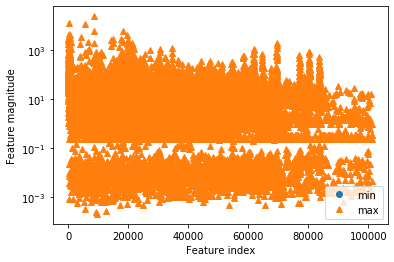

In [27]:
plt.plot(X_train.min(axis=0), 'o', label="min") 
plt.plot(X_train.max(axis=0), '^', label="max") 
plt.legend(loc=4)
plt.xlabel("Feature index") 
plt.ylabel("Feature magnitude") 
plt.yscale("log")


In [45]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set 
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training 
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0))) 
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
0         NaN
1         NaN
2         0.0
3         NaN
4         0.0
         ... 
101295    NaN
101296    NaN
101297    NaN
101298    NaN
101299    NaN
Length: 101300, dtype: float64
Maximum for each feature
 0         NaN
1         NaN
2         1.0
3         NaN
4         1.0
         ... 
101295    NaN
101296    NaN
101297    NaN
101298    NaN
101299    NaN
Length: 101300, dtype: float64


Scaling and centering can also be done within a pipeline to make this process quicker. MinMaxScaler preprocessing method can be used instead of using the manual method above. 

In [55]:
#scaling and centering in pipline 
#import the necessary modules
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline

In [60]:
#setup the pipeline steps: steps
steps = [('scaler', MinMaxScaler()),
        ('SVM', svm.SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the pipeline to the training set: knn_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
svc_unscaled = svc.fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.9411764705882353
Accuracy without Scaling: 0.9411764705882353


Now we can see if there is a difference using the standard scaler in a pipeline.

In [64]:
#setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('SVM', svm.SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the pipeline to the training set: knn_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
svc_unscaled = svc.fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.9411764705882353
Accuracy without Scaling: 0.9411764705882353


In [66]:
#Pipeline for classification
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', svm.SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 1000],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9411764705882353
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.86      0.92         7

    accuracy                           0.94        17
   macro avg       0.95      0.93      0.94        17
weighted avg       0.95      0.94      0.94        17

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.1}


## PCA 

In [67]:
from sklearn.decomposition import PCA

In [69]:
#build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=16)),
        ('classifier',svm.SVC())])

#fit the pipeline to the training datA
pipe.fit(X_train, y_train)

#score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

#prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.38292233 0.18447505 0.06563357 0.06000496 0.04557259 0.03904013
 0.03684829 0.03620122 0.02944592 0.02576071 0.02346922 0.02139708
 0.01971206 0.01481332 0.00799426 0.00485559]
94.1% test set accuracy


Performs better with PC compared to the other models using PC.

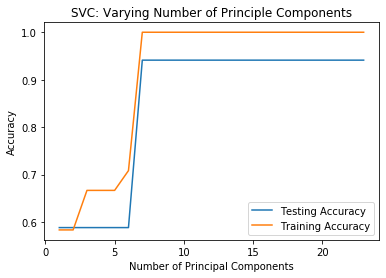

In [72]:
# Setup arrays to store train and test accuracies
n_components = np.arange(1, 24)
train_accuracy = np.empty(len(n_components))
test_accuracy = np.empty(len(n_components))

# Loop over different values of k
for i, k in enumerate(n_components):
    
    #setup a pipeline with a k-NN Classifier with k neighbors: knn
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=k)),
        ('classifier', svm.SVC())])

    #fit the pipeline to to the training data
    pipe.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = pipe.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = pipe.score(X_test, y_test)

# Generate plot
plt.title('SVC: Varying Number of Principle Components')
plt.plot(n_components, test_accuracy, label = 'Testing Accuracy')
plt.plot(n_components, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.show()